### Prognoza zmiennej "Saldo obrotów" na 12 okresów za pomocą sieci neuronowych LSTM
### Źródła:
### https://bibliotekanauki.pl/articles/2130853
### https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/
### POMOC CHATA GPT 4o


In [62]:
# Import bibliotek oraz danych
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_excel('Dane_final.xlsx') 
saldo = df['SALDO']

saldo.head()

0   -10211.0
1   -11183.9
2   -14831.2
3   -18936.3
4   -13622.1
Name: SALDO, dtype: float64

In [63]:
# Normalizacja danych
# LSTM działa lepiej, gdy dane wejściowe są skalowane do małego zakresu, np. od 0 do 1.
# Dane wejściowe (lista wartości x) są przekształcane w macierz o jednej kolumnie za pomocą reshape(-1, 1), a następnie normalizowane.

scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(np.array(saldo).reshape(-1, 1))

In [64]:
# Tworzenie zestawu danych - przygotowanie dane do trenowania modelu.
# Każdy zestaw wejściowy 𝑋 awiera time_step (np. 10) kolejnych wartości.
# Wartości docelowe 𝑦 to kolejne wartości w szeregu czasowym (jedna po wartości z X).

def create_dataset(data, time_step):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)


In [65]:
# Parametry modelu
# LSTM (i inne modele do prognozowania szeregów czasowych) korzysta z pamięci o sekwencji danych.
# Time step (krok czasowy): Liczba wartości historycznych, które model uwzględnia w jednej próbce wejściowej.

time_step = 10  # liczba kroków czasu
X, Y = create_dataset(x_scaled, time_step)


In [ ]:
# Przekształcenie danych dla sieci LSTM
# LSTM wymaga danych w formacie trójwymiarowym: liczba próbek × iczba kroków czasowych × liczba cech

X = X.reshape(X.shape[0], X.shape[1], 1)


[[[0.39346128]
  [0.37199868]
  [0.29153761]
  [0.20097728]
  [0.3182109 ]
  [0.21411427]
  [0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]]

 [[0.37199868]
  [0.29153761]
  [0.20097728]
  [0.3182109 ]
  [0.21411427]
  [0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]
  [0.47976616]]

 [[0.29153761]
  [0.20097728]
  [0.3182109 ]
  [0.21411427]
  [0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]
  [0.47976616]
  [0.38053386]]

 [[0.20097728]
  [0.3182109 ]
  [0.21411427]
  [0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]
  [0.47976616]
  [0.38053386]
  [0.51774322]]

 [[0.3182109 ]
  [0.21411427]
  [0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]
  [0.47976616]
  [0.38053386]
  [0.51774322]
  [0.64595191]]

 [[0.21411427]
  [0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]
  [0.47976616]
  [0.38053386]
  [0.51774322]
  [0.64595191]
  [0.62393338]]

 [[0.27444518]
  [0.2422634 ]
  [0.2969711 ]
  [0.33131039]
  [0.47976616]
  [0.38053386

In [66]:
# Budowanie modelu LSTM
# Model Sequential - dodajemy warstwy w sposób sekwencyjny.

# Warstwy LSTM:
#   Pierwsza warstwa: 50 jednostek LSTM, return_sequences=True (zwraca pełną sekwencję dla następnej warstwy).
#   Druga warstwa: 50 jednostek LSTM, return_sequences=False (zwraca tylko ostatnią wartość).

# Warstwy Dense:
#   Pierwsza: 25 neuronów (warstwa w pełni połączona).
#   Druga: 1 neuron (prognoza jednej wartości w przyszłości).

#Optymalizator: adam do skutecznej optymalizacji.
# Funkcja straty: mean_squared_error do minimalizowania błędu średniokwadratowego.


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Mateusz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
# Trenowanie modelu
# epochs=100: model przechodzi przez dane 100 razy.
# batch_size=1: aktualizacje wag są dokonywane po każdej próbce.

model.fit(X, Y, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1477
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0700
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0692
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0639
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0553
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0450
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0489
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0477
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0398
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0409  
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410
Epoch 13/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0175
Epoch 14/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0545
Epoch 15/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0302  


In [68]:
# Prognoza dla następnych 12 okresów
# Iteracyjne prognozowanie: Model przewiduje jedną wartość na podstawie aktualnego wejścia.
# Nowa wartość jest dodawana do danych wejściowych, a najstarsza wartość jest usuwana.

input_data = x_scaled[-time_step:].reshape(1, time_step, 1)  # Ostatnie kroki czasu
predictions = []
for _ in range(12):
    pred = model.predict(input_data, verbose=0)
    predictions.append(pred[0][0])
    # Aktualizacja danych wejściowych
    input_data = np.append(input_data[:, 1:, :], [[[pred[0][0]]]], axis=1)

In [ ]:
# Odwrócenie normalizacji dla prognoz
# Prognozy są z powrotem przekształcane do pierwotnej skali.
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Wyświetlanie wyników
print("Prognozowane wartości na 12 kolejnych okresów:")
print(predictions.flatten())

In [ ]:
# Analiza zmienności historycznej

print(predictions)
data_std = np.std(X)

# Dodanie wariantów optymistycznego i pesymistycznego
predictions_optimistic = predictions.flatten() + data_std
predictions_pessimistic = predictions.flatten() - data_std

# Wyświetlanie wyników
print("Wariant optymistyczny (z uwzględnieniem zmienności):")
print(predictions_optimistic)

print("Wariant pesymistyczny (z uwzględnieniem zmienności):")
print(predictions_pessimistic)

In [83]:
# Obliczanie odchylenia standardowego dla oryginalnych danych
original_std = df['SALDO'].std()

# Dodanie wariantów optymistycznego i pesymistycznego
predictions_optimistic = predictions.flatten() + original_std
predictions_pessimistic = predictions.flatten() - original_std

# Wyświetlanie wyników
print("Wariant optymistyczny (z uwzględnieniem zmienności):")
print(predictions_optimistic)

print("Wariant pesymistyczny (z uwzględnieniem zmienności):")
print(predictions_pessimistic)

# Zapis prognoz do pliku Excel
forecast_df = pd.DataFrame({
    'Okres': forecast_indices,
    'Prognoza': predictions.flatten(),
    'Prognoza optymistyczna': predictions_optimistic,
    'Prognoza pesymistyczna': predictions_pessimistic
})

forecast_df.to_excel('Prognozy.xlsx', index=False)

Wariant optymistyczny (z uwzględnieniem zmienności):
[ 26325.88422132  29971.49652601  27276.25824476  17079.29193616
   1991.54144788  -9138.63628649 -13290.02691149 -15147.70464587
 -20559.97027087 -30001.53472399 -18593.11284899  22207.93988538]
Wariant pesymistyczny (z uwzględnieniem zmienności):
[  4664.2114818    8309.82378649   5614.58550524  -4582.38080335
 -19670.13129163 -30800.30902601 -34951.69965101 -36809.37738538
 -42221.64301038 -51663.20746351 -40254.78558851    546.26714587]


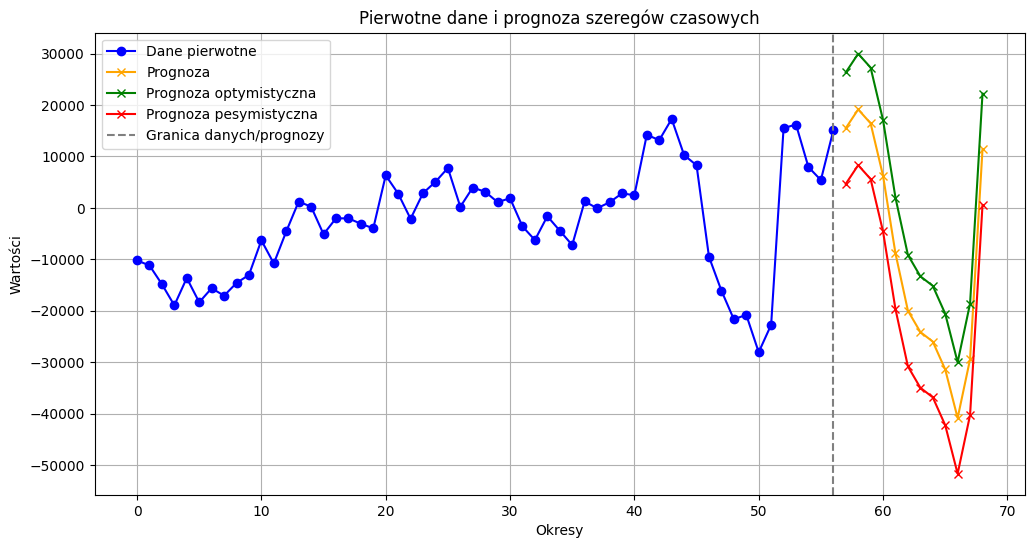

In [84]:
import matplotlib.pyplot as plt

# Indeksy dla danych pierwotnych i prognozowanych
original_indices = np.arange(len(saldo))
forecast_indices = np.arange(len(saldo), len(saldo) + 12)

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(original_indices, saldo, label="Dane pierwotne", marker='o', color='blue')
plt.plot(forecast_indices, predictions.flatten(), label="Prognoza", marker='x', color='orange')
plt.plot(forecast_indices, predictions_optimistic , label="Prognoza optymistyczna", marker='x', color='green')
plt.plot(forecast_indices, predictions_pessimistic, label="Prognoza pesymistyczna", marker='x', color='red')
plt.axvline(x=len(saldo) - 1, linestyle='--', color='grey', label='Granica danych/prognozy')
plt.title("Pierwotne dane i prognoza szeregów czasowych")
plt.xlabel("Okresy")
plt.ylabel("Wartości")
plt.legend()
plt.grid()
plt.savefig('Prognoza_wykres.png')
plt.show()